1) Подготовка данных

In [25]:
# Загрузка библиотек
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [26]:
# Загрузка датасета
url = "https://raw.githubusercontent.com/safin92/lab1/refs/heads/main/Iris.csv"
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2) Проверка и преодобработка данных

In [27]:
# Проверим на пропуски и типы данных
df.info() # пропусков нет, искомый признак имеет тип данных object, поэтому потребуется выполнить преобразование данного признака в числовое

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
# Проверим содержание числовых признаков
df.describe() # данные не имеют выбросов, но имеют разный масштаб, вероятно потребуется нормализация данных

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>,
        <Axes: title={'center': 'Species'}>]], dtype=object)

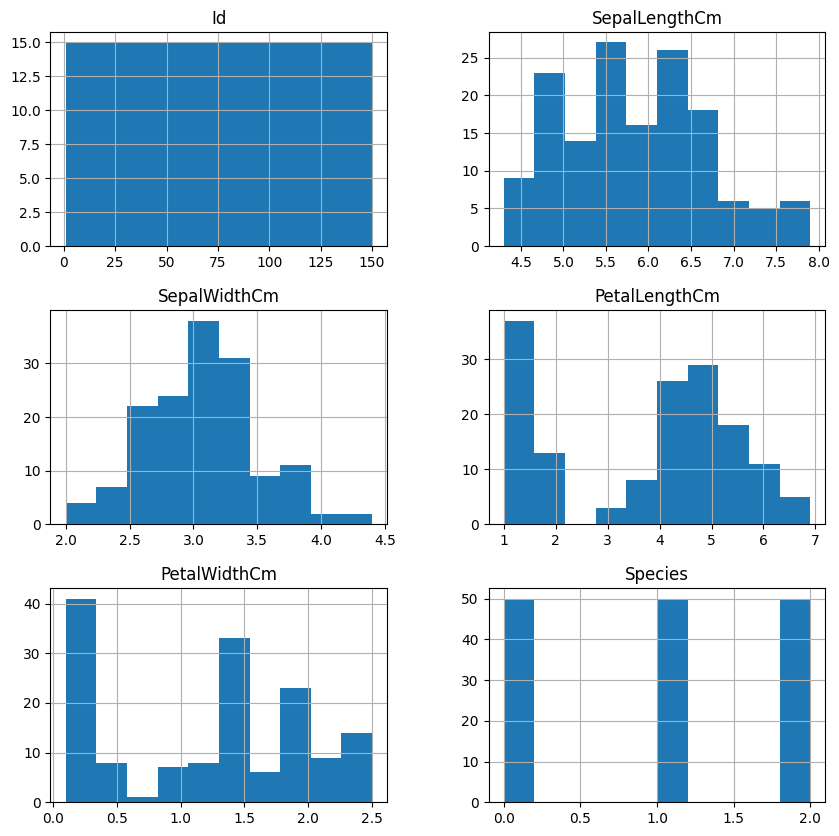

In [32]:
# Посмотрим какую форму распределения имют наши данные
df.hist(figsize=(10, 10))

In [29]:
# Проверим корреляцию признаков с целевой перменной и между собой
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
corr = df.corr()
corr['Species'].sort_values(ascending=False) # Сильная корреляция двух признаков и существенная у третьего, модель должна получиться с высокой точностью

,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
Id,0.942830
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


In [31]:
# Разделим данные на тренировочный и тестовый набор
X = df.drop(['Id', 'Species'], axis=1) # удаляем ненужные столбцы
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование искомого признака методом Label Encoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Нормализация данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3) Линейная регрессия

In [22]:
# Объявляем библиотеки
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, r2_score, mean_squared_error

In [23]:
# Выполним обучение и проверку качества модели
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print("Линейная регрессия:")
print(f"R^2: {lr_r2:.4f}")
print(f"MSE: {lr_mse:.4f}")


Линейная регрессия:
R^2: 0.9467
MSE: 0.0372


4) Логистическая регрессия

In [24]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

log_accuracy = log_model.score(X_test_scaled, y_test)
log_precision = precision_score(y_test, log_pred, average='macro')
log_recall = recall_score(y_test, log_pred, average='macro')
log_f1 = f1_score(y_test, log_pred, average='macro')

print("\nЛогистическая регрессия:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1-score: {log_f1:.4f}")



Логистическая регрессия:
Accuracy: 0.9667
Precision: 0.9722
Recall: 0.9630
F1-score: 0.9659
